# Where to eat in New Delhi?

# Introduction

# Table of Content

In [130]:
# Import the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.plotly as py
init_notebook_mode(connected=True)
from IPython.display import display
from IPython.core.display import HTML
%matplotlib inline

import os, gc, warnings
warnings.filterwarnings("ignore")

In [131]:
countryCode_toName = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Phillipines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "United Kingdom",
    216: "United States",
}

In [132]:
def number_of_cusines(temp):
    #print (temp)
    return len(temp.split())

In [133]:
# Load the data
data = pd.read_csv("../input/zomato.csv", encoding = "ISO-8859-1")
data['Country'] = data['Country Code'].apply(lambda x: countryCode_toName[x])
data.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
2757,18294263,Karachi Bakery,1,New Delhi,"Shop 21, Bengali Market, Barakhamba Road, New ...",Barakhamba Road,"Barakhamba Road, New Delhi",77.232140,28.629655,"Bakery, Mithai",200,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4,India
5583,18449653,Food Campus,1,New Delhi,"Plot 2706, Main Road, Mukherjee Nagar, New Delhi",Mukherjee Nagar,"Mukherjee Nagar, New Delhi",77.216399,28.714030,North Indian,100,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0,India
3845,18124350,Delhi Chaat Bhandar,1,New Delhi,"Parmanand Chowk, Kingsway Camp, GTB Nagar, New...",GTB Nagar,"GTB Nagar, New Delhi",77.204432,28.709928,"Fast Food, Chinese",150,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1,India
2955,18311930,Cuisine,1,New Delhi,"Rockland Inn, B-207, Block B, Outer Ring Road,...",Chittaranjan Park,"Chittaranjan Park, New Delhi",77.241773,28.542694,"North Indian, Mughlai, Chinese",1500,Indian Rupees(Rs.),Yes,No,No,No,3,0.0,White,Not rated,1,India
3628,18438446,Madras Cafe,1,New Delhi,"Bhagwan Das Kothi, Gandhi Nagar, Geeta Colony,...",Geeta Colony,"Geeta Colony, New Delhi",77.266521,28.659857,South Indian,250,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0,India


In [134]:
# We only neew the data of India
data_india = data.loc[data.Country == "India"]

In [135]:
data_india.shape

(8652, 22)

In [136]:
data_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8652 entries, 624 to 9275
Data columns (total 22 columns):
Restaurant ID           8652 non-null int64
Restaurant Name         8652 non-null object
Country Code            8652 non-null int64
City                    8652 non-null object
Address                 8652 non-null object
Locality                8652 non-null object
Locality Verbose        8652 non-null object
Longitude               8652 non-null float64
Latitude                8652 non-null float64
Cuisines                8652 non-null object
Average Cost for two    8652 non-null int64
Currency                8652 non-null object
Has Table booking       8652 non-null object
Has Online delivery     8652 non-null object
Is delivering now       8652 non-null object
Switch to order menu    8652 non-null object
Price range             8652 non-null int64
Aggregate rating        8652 non-null float64
Rating color            8652 non-null object
Rating text             8652 non-null

The data contains the following columns -

- Restaurant ID - Unique identification assigned to each restaurant by Zomato. In itself, for this dataset, it does not serve any - - useful purpose.
- Restaurant Name - Name of the Restaurant
- Country Code
- City*
- Address
- Locality
- Locality Verbose - Locality along with City info*
- Latitude*
- Longitude*
- Cusinies - List of cusines served*
- Average Cost of two (INR if consider data from India/Indian Cities)*
- Currency
- Has Table Booking (boolean)
- Has Online Delivery (boolean)
- Is Delivering Now (boolean)
- Switch to order menu (boolean)
- Price range (levels)
- Aggregate rating (avg of all votes received)*
- Rating Color (Zomato's lingo)
- Rating text (V.Good,Good,Avg,Poor)*
- Votes
*Points of Interest

## Quick Inferences -
1. Zomato's largest market is in India itself, nobody even comes close.
2. Analysing data from India should give us a pretty accurate representation of the entire data.
3. One important thing that might vary across different regions is the types of Cusinies. So it should be interesting to see how many cusinies are served throughout the world.


# Number of Cuisines Served in Zomato's Target Markets
( Considering countries only where 50 or more Restaurants are registered with Zomato)

In [137]:
# Fill the missing values of Cuisines 
data_india.Cuisines.fillna("zero", inplace=True)
data_india['Number of Cuisines Offered'] = data_india.Cuisines.apply(number_of_cusines)

# Let's see the number of Cuisines offered by the Restaurants in New Delhi, Gurgaon, Noida and Faridabad 

In [138]:
trace = [
    go.Histogram(x=data_india.loc[data_india.City.isin(['New Delhi'])]['Number of Cuisines Offered'],
                 visible=True,
                opacity = 0.7,
                 name="New Delhi",
                histnorm="percent",
                 hoverinfo="y",
                #nbinsx=10,
                 marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(200, 180, 200)')
                ),
    go.Histogram(x=data_india.loc[data_india.City.isin(['Gurgaon'])]['Number of Cuisines Offered'],
                 visible=False,
                opacity = 0.7,
                 name = "Gurgaon",
                 hoverinfo="y",
                histnorm="percent",
                #nbinsx=10,
                 marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(210, 185, 215)')
                ),
    go.Histogram(x=data_india.loc[data_india.City.isin(['Noida'])]['Number of Cuisines Offered'],
                 visible=False,
                opacity = 0.7,
                 name = "Noida",
                 hoverinfo="y",
                histnorm="percent",
                #nbinsx=10,
                 marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(220, 190, 220)')
                ),
    go.Histogram(x=data_india.loc[data_india.City.isin(['Faridabad'])]['Number of Cuisines Offered'],
                 visible=False,
                opacity = 0.7,
                 name = "Faridabad",
                 hoverinfo="y",
                histnorm="percent",
                #nbinsx=10,
                 marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(230, 200, 220)')
                ),
    go.Histogram(x=data_india.loc[data_india.City.isin(['Ghaziabad'])]['Number of Cuisines Offered'],
                 visible=False,
                opacity = 0.7,
                 name = "Ghaziabad",
                 hoverinfo="y",
                histnorm="percent",
                #nbinsx=10,
                 marker=dict(line=dict(width=1.6,
                                      color='rgb(75, 75, 75)',),
                            color='rgb(240, 210, 220)')
                ),
]

layout = go.Layout(autosize=True,
                   #height=800,
                   #width=900,
                   xaxis=dict(title="Number of Cuisines Offered",
                             titlefont=dict(size=20,),
                             tickmode="linear",),
                   yaxis=dict(title="Percentage of Restaurants <br> Associated with Zomato",
                             titlefont=dict(size=17,),),
                  )

updatemenus = list([
    dict(
    buttons=list([
        dict(
            args = [{'visible': [True, False, False, False]}],
            label="New Delhi",
            method='update',
        ),
        dict(
            args = [{'visible': [False, True, False, False]}],
            label="Gurgaon",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, True, False]}],
            label="Noida",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, True]}],
            label="Faridabad",
            method='update',
        ),
    ]),
        direction="down",
        pad = {'r':10, "t":10},
        showactive=True,
        x=0.7,
        y=1.15,
        yanchor='top',
    ),
])

#annotations = list([
#    dict(text='City: ', x=5.0, y=1.1, yref='paper', align='right', showarrow=False)
#])

layout['updatemenus'] = updatemenus
#layout['annotations'] = annotations

fig = dict(data=trace, layout=layout)
iplot(fig)

# Total Numbers of Restaurants in New Delhi, Gurgaon, Noida and Faridabad

In [139]:
# Filter out the required data
data_ncr =  data_india.loc[data_india.City.isin(['New Delhi','Gurgaon','Noida','Faridabad'])]

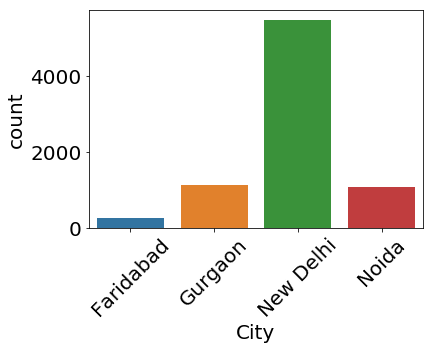

In [140]:
g = sns.countplot(data_ncr["City"])
g = plt.setp(g.get_xticklabels(), rotation=45) 

# Are ratings affected by how cheap/expensive a restaurant is?
The following plot was created by aggrating the ratings & the average cost of two for eating at a particular place.

In [141]:
data_ncr['Text'] = data_ncr['Restaurant Name'] + "<br>" + data_ncr['Locality Verbose']
data_ncr_rest = data_ncr[['Restaurant Name','Aggregate rating',
                              'Average Cost for two']].groupby('Restaurant Name').mean()

In [142]:
data = [
    go.Scatter(x = data_ncr_rest['Average Cost for two'],
              y = data_ncr_rest['Aggregate rating'],
               text = data_ncr['Text'],
              mode = "markers",
               marker = dict(opacity = 0.7,
                            size = 10,
                            color = data_ncr_rest['Aggregate rating'], #Set color equalivant to rating
                            colorscale= 'Bluered',
                            showscale=True,
                             maxdisplayed=2500,
                            ),
                hoverinfo="text+x+y",
              )
]
layout = go.Layout(autosize=True,
                   xaxis=dict(title="Average Cost of Two in Rupees",
                             #titlefont=dict(size=20,),
                             #tickmode="linear",
                             ),
                   yaxis=dict(title="Ratings",
                             #titlefont=dict(size=17,),
                             ),
                  )
iplot(dict(data=data, layout=layout))

# Quick Inference
As it seems, from a quick glance, there is no obseravable linear relationship. At almost every price point, there appears to be both Good and Bad restaurants.

# Most common type of food
It'd be intersting to know where the known-eateries that are commonplace. The verticles across which these can be located are 

Breakfast
American Fast Food
Ice Creams, Shakes & Desserts

In [143]:
types = {
    "Breakfast" : ["Subway", "Dunkin' Donuts", "Chaayos", "McDonald's", "Sagar Ratna", "Haldiram's", "Burger King", "Bikanervala"],
    "Fast Food": ["McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut", "Domino's Pizza", "KFC"],
    "North Indian and Mughlai": ["Wah Ji Wah", "Pind Balluchi", "Moti Mahal Delux", "Apni Rasoi", "Punjabi Tadka", "Kebab Xpress", "Chawla's_", "Barbeque Nation", "Kake Da Hotel", "Aapki Rasoi", "Moti Mahal Delux Tandoori Trail", "Al Bake"]
}
breakfast = data_ncr.loc[data_ncr['Restaurant Name'].isin(types['Breakfast'])]
fast_food = data_ncr.loc[data_ncr['Restaurant Name'].isin(types['Fast Food'])]
north_indian = data_ncr.loc[data_ncr['Restaurant Name'].isin(types['North Indian and Mughlai'])]

print ("Breakfast: ", breakfast.shape, "\nFast Food: ", fast_food.shape, "\nNorth Indian and Mughlai: ", north_indian.shape)

Breakfast:  (206, 24) 
Fast Food:  (252, 24) 
North Indian and Mughlai:  (108, 24)


Breakfast & Coffee
Common places to have Breakfast & Coffee include Starbucks, Barista etc.

Average Ratings of Common Coffee Shops¶

In [144]:
breakfast_rating = breakfast[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = breakfast_rating['Restaurant Name']
y_ax = breakfast_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(159, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none"
          )
]

layout = go.Layout(title = "Average Ratings of Breakfast Cafes",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Cafe",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

# Where to find some good Breakfast cafes?

In [145]:
breakfast_locations = breakfast[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
breakfast_locations['Text'] = breakfast_locations['Restaurant Name'] + "<br>Rating: "+breakfast_locations['Rating text']+" ("+breakfast_locations['Aggregate rating'].astype(str)+")" + "<br>" + breakfast_locations['Locality Verbose']
mapbox_access_token = 'pk.eyJ1Ijoic291dmlrYjA3IiwiYSI6ImNqbG5ucDJzejFsMnQzd2ttc2pocTVveGYifQ.QGZmlHpfNUbXUzQz-VKRNA'
breakfast_locations.sample(5)

,Restaurant Name,Locality Verbose,City,Longitude,Latitude,Average Cost for two,Aggregate rating,Rating text,Text
194,Subway,"Sector 50, Noida",Noida,77.361918,28.570513,500,2.5,Average,"Subway<br>Rating: Average (2.5)<br>Sector 50, ..."
193,McDonald's,"Sector 38, Noida",Noida,77.325417,28.566438,500,3.5,Good,"McDonald's<br>Rating: Good (3.5)<br>Sector 38,..."
67,Sagar Ratna,"Defence Colony, New Delhi",New Delhi,77.230322,28.573383,600,4.0,Very Good,Sagar Ratna<br>Rating: Very Good (4.0)<br>Defe...
30,Subway,"Sohna Road, Gurgaon",Gurgaon,77.038244,28.418416,500,2.9,Average,"Subway<br>Rating: Average (2.9)<br>Sohna Road,..."
55,Dunkin' Donuts,"Connaught Place, New Delhi",New Delhi,77.219633,28.630166,600,3.9,Good,Dunkin' Donuts<br>Rating: Good (3.9)<br>Connau...


In [146]:
display(HTML("""<div>
    <a href="https://plot.ly/~saouvik01/4/?share_key=iO2ERpILurdUuCf1EjfjpO" target="_blank" title="Plot 4" style="display: block; text-align: center;"><img src="https://plot.ly/~saouvik01/4.png?share_key=iO2ERpILurdUuCf1EjfjpO" alt="Plot 4" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="saouvik01:4" sharekey-plotly="iO2ERpILurdUuCf1EjfjpO" src="https://plot.ly/embed.js" async></script>
</div>"""))

# Fast Food
Assessing Average Ratings of American Fast Food Chains like McDonald's, Subway etc

In [147]:
fast_food_rating = fast_food[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = fast_food_rating['Restaurant Name']
y_ax = fast_food_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(202, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none",
          )
]

layout = go.Layout(title = "Average Ratings of Fast Food Cafes",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Cafe",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

Quite surprising to see Burger King rated over McDonald's, or maybe it's just a personal bias!

# Where to find the fast food chain restaurants

In [148]:
fast_food_locations = fast_food[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
fast_food_locations['Text'] = fast_food_locations['Restaurant Name'] + "<br>Rating: "+fast_food_locations['Rating text']+" ("+fast_food_locations['Aggregate rating'].astype(str)+")" + "<br>" + fast_food_locations['Locality Verbose']

In [149]:
display(HTML("""<div>
    <a href="https://plot.ly/~saouvik01/7/?share_key=jiAQlWu9JC4QQQBjA75htl" target="_blank" title="Plot 7" style="display: block; text-align: center;"><img src="https://plot.ly/~saouvik01/7.png?share_key=jiAQlWu9JC4QQQBjA75htl" alt="Plot 7" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="saouvik01:7" sharekey-plotly="jiAQlWu9JC4QQQBjA75htl" src="https://plot.ly/embed.js" async></script>
</div>"""))


# The best North Indian and Mughlai Food Cafes

In [150]:
desi_rating = north_indian[['Restaurant Name',
                              'Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating', 
                                                                                                               ascending=False)
x_ax = desi_rating['Restaurant Name']
y_ax = desi_rating['Aggregate rating'].apply(lambda x: round(x,2))

data = [
    go.Bar(x = x_ax,
          y = y_ax,
          text = y_ax,
          textposition='auto',
          marker = dict(color = 'rgb(0, 202, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        hoverinfo="none",
          )
]

layout = go.Layout(title = "Average Ratings of North Indian and Mughlai Cafes",
                  yaxis = dict(title="Average Rating",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Cafes",
                               titlefont=dict(size=20),),
                  )


fig = go.Figure(data=data, layout=layout)

iplot(fig)

# Locations of Popular Mughlai and North Indian in & around Delhi

In [151]:
desi_locations = north_indian[['Restaurant Name','Locality Verbose','City',
                                'Longitude','Latitude','Average Cost for two','Aggregate rating',
                                'Rating text']].reset_index(drop=True)
desi_locations['Text'] = desi_locations['Restaurant Name'] + "<br>Rating: "+desi_locations['Rating text']+" ("+desi_locations['Aggregate rating'].astype(str)+")" + "<br>" + desi_locations['Locality Verbose']

In [152]:
display(HTML("""<div>
    <a href="https://plot.ly/~saouvik01/10/?share_key=wu5k3q0Vxs6thKQlaTUNon" target="_blank" title="Plot 10" style="display: block; text-align: center;"><img src="https://plot.ly/~saouvik01/10.png?share_key=wu5k3q0Vxs6thKQlaTUNon" alt="Plot 10" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="saouvik01:10" sharekey-plotly="wu5k3q0Vxs6thKQlaTUNon" src="https://plot.ly/embed.js" async></script>
</div>"""))


# Pre-booking a Lunch/Dinner according to average budget?
Here are some of the top restaurants in Delhi & it's neighbouring areas with the following characterstics -

Have a rating > 4
Have an option to pre-book a table
Had at least 50 people rate it on Zomato

In [153]:
# Data for Under 1000
booking_cafe_1000 = data_ncr.loc[(data_ncr["Average Cost for two"] <=1000) & (data_ncr['Has Table booking'] == "Yes") & (data_ncr['Aggregate rating'] > 4) & (data_ncr['Votes'] > 50)].sort_values('Aggregate rating', ascending = False)
x_ax_1000 = booking_cafe_1000.head(10)['Restaurant Name']
y_ax_1000 = booking_cafe_1000.head(10)['Average Cost for two']

# Data for range(1000,3000)
booking_cafe_1001 = data_ncr.loc[(data_ncr["Average Cost for two"] >1000) & (data_ncr["Average Cost for two"] <=2000) & (data_ncr['Has Table booking'] == "Yes") & (data_ncr['Aggregate rating'] > 4) & (data_ncr['Votes'] > 50)].sort_values('Aggregate rating', ascending = False)
x_ax_1001 = booking_cafe_1001.head(15)['Restaurant Name']
y_ax_1001 = booking_cafe_1001.head(15)['Average Cost for two']

# Data range(3000,5000)
booking_cafe_2000 = data_ncr.loc[(data_ncr["Average Cost for two"] >2000) & (data_ncr["Average Cost for two"] <=3000) & (data_ncr['Has Table booking'] == "Yes") & (data_ncr['Aggregate rating'] > 4) & (data_ncr['Votes'] > 50)].sort_values('Aggregate rating', ascending = False)
x_ax_2000 = booking_cafe_2000.head(15)['Restaurant Name']
y_ax_2000 = booking_cafe_2000.head(15)['Average Cost for two']

# Data above 5000
booking_cafe_3000 = data_ncr.loc[(data_ncr["Average Cost for two"] >3000) & (data_ncr['Has Table booking'] == "Yes") & (data_ncr['Aggregate rating'] > 4) & (data_ncr['Votes'] > 50)].sort_values('Aggregate rating', ascending = False)
x_ax_3000 = booking_cafe_3000.head(15)['Restaurant Name']
y_ax_3000 = booking_cafe_3000.head(15)['Average Cost for two']

In [154]:
trace = [
    go.Bar(x = x_ax_1000,
          y = y_ax_1000,
          text = booking_cafe_1000.head(15)['Cuisines'],
          textposition='auto',
          marker = dict(color = 'rgb(200, 234, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        #hoverinfo="text",
           hovertext=booking_cafe_1000.head(15)['Locality Verbose'],
           #orientation="h",
          ),
    go.Bar(x = x_ax_1001,
          y = y_ax_1001,
          text = booking_cafe_1001.head(15)['Cuisines'],
          textposition='auto',
          marker = dict(color = 'rgb(200, 234, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        #hoverinfo="text",
           hovertext=booking_cafe_1001.head(15)['Locality Verbose'],
           #orientation="h",
          ),
    go.Bar(x = x_ax_2000,
          y = y_ax_2000,
          text = booking_cafe_2000.head(15)['Cuisines'],
          textposition='auto',
          marker = dict(color = 'rgb(200, 234, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        #hoverinfo="text",
           hovertext=booking_cafe_2000.head(15)['Locality Verbose'],
           #orientation="h",
          ),
    go.Bar(x = x_ax_3000,
          y = y_ax_3000,
          text = booking_cafe_3000.head(15)['Cuisines'],
          textposition='auto',
          marker = dict(color = 'rgb(200, 234, 220)',
                       line = dict(color='rgb(8, 48, 107)',
                                  width=1.5),
                       ),
          opacity=0.6,
        #hoverinfo="text",
           hovertext=booking_cafe_3000.head(15)['Locality Verbose'],
           #orientation="h",
          )
]
layout = go.Layout(title = "Hover to display the locality of the restaurant",
                  yaxis = dict(title="Average Cost for two",
                              titlefont=dict(size=20)),
                   xaxis = dict(title="Restaurant",
                               titlefont=dict(size=20),),
                  )
updatemenus = list([
    dict(
    buttons=list([
        dict(
            args = [{'visible': [True, False, False, False]}],
            label="Price Under 1000",
            method='update',
        ),
        dict(
            args = [{'visible': [False, True, False, False]}],
            label="Price range(1000 to 2000)",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, True, False]}],
            label="Price range(2000 to 3000)",
            method='update',
        ),
        dict(
            args = [{'visible': [False, False, False, True]}],
            label="Price Above 3000 ",
            method='update',
        ),
    ]),
        direction="down",
        pad = {'r':10, "t":10},
        showactive=True,
        x=0.7,
        y=1.15,
        yanchor='top',
    ),
])

#annotations = list([
#    dict(text='City: ', x=5.0, y=1.1, yref='paper', align='right', showarrow=False)
#])

layout['updatemenus'] = updatemenus
#layout['annotations'] = annotations

fig = dict(data=trace, layout=layout)
iplot(fig)
